In [1]:
#1) import libraries using inbuilt functions - panda(data analysis), numpy (create arrays), matplotlib (graphs)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files

In [2]:
from google.colab import files

In [73]:
uploaded = files.upload()

Saving train.csv to train.csv


In [74]:
#2) import dataset, downladed train.csv from online (kaggle)
import io
train_dataset = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [75]:
#3) Exploratory data anaylsis
train_dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Returns a statistically description of the data in the DataFrame

In [6]:
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_dataset.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='index'>

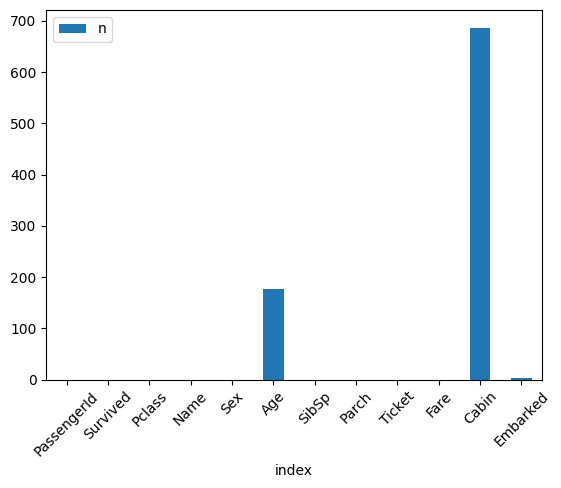

In [9]:
train_dataset.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=45)

dropna() - will drop all the na values

however, if you do not specify it will get rid of the whole row (test by storing data in a different variable)

***what will we delete and why?***

two columns with name, ticket number missing data. 2 values will not help a ML module decide whether someone survived, can delete ticket number column, and name (as this info will not identify whether someone is more likely to survive).

687 cabin values column - over 70% of missing data.
ticket numbers - random numbers

In [10]:
#Delete what should be deleted
del train_dataset['Ticket']
del train_dataset['Cabin']
del train_dataset['Name']
del train_dataset['PassengerId']

In [11]:
train_dataset.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
train_dataset.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


set embarked as 0? fill the two missing values with the most common mode of embarked column

In [13]:
train_dataset.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
train_dataset.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [15]:
# cell 9: Understand Age
print(train_dataset['Age'].max())
print(train_dataset['Age'].min())
print(train_dataset['Age'].max() - train_dataset['Age'].min())

80.0
0.42
79.58


In [16]:
#Check if age is affected by sex
train_dataset.groupby('Sex', as_index=False)['Age'].median()

,Sex,Age
0,female,27.0
1,male,29.0


In [17]:
#Check if age is affected by Pclass
train_dataset.groupby('Pclass', as_index=False)['Age'].median()

,Pclass,Age
0,1,37.0
1,2,29.0
2,3,24.0


In [18]:
train_dataset.groupby('Pclass', as_index=False)['Age'].median()

,Pclass,Age
0,1,37.0
1,2,29.0
2,3,24.0


In [19]:
#Filling the NaN values in the age coloum with the median value of the age per class

train_dataset.loc[(train_dataset.Age.isna()) & ((train_dataset.Pclass == 1)), "Age"] = 37.0
train_dataset.loc[(train_dataset.Age.isna()) & ((train_dataset.Pclass == 2)), "Age"] = 29.0
train_dataset.loc[(train_dataset.Age.isna()) & ((train_dataset.Pclass == 3)), "Age"] = 24.0

In [20]:
train_dataset.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [21]:
#Going back to Explorotory Data Analysis now that there are no more missing values. Visualising the data with graphs.
male = train_dataset[train_dataset.Sex == 'male']
female = train_dataset[train_dataset.Sex == 'female']

In [22]:
female.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


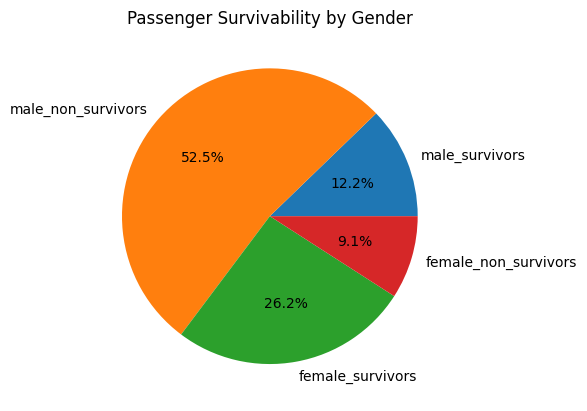

In [23]:
# Creating a pie chart of female percentage of survivng and male percentage of surviving

# Calculations of percentages for each 'shape' gives us the count
male_survivors = male[male.Survived == 1].shape[0]/train_dataset.shape[0]
male_non_survivors = male[male.Survived == 0].shape[0]/train_dataset.shape[0]
female_survivors = female[female.Survived == 1].shape[0]/train_dataset.shape[0]
female_non_survivors = female[female.Survived == 0].shape[0]/train_dataset.shape[0]

# Drawing the pie chart from our calculations
labels = 'male_survivors', 'male_non_survivors', 'female_survivors', 'female_non_survivors'
sizes = [male_survivors, male_non_survivors, female_survivors, female_non_survivors]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Passenger Survivability by Gender")
plt.show()


In [24]:
# Filtering based on class and whether they survived or not

class1 = train_dataset[train_dataset.Pclass == 1]
class2 = train_dataset[train_dataset.Pclass == 2]
class3 = train_dataset[train_dataset.Pclass == 3]
class1_survivors = class1[class1.Survived == 1]
class2_survivors = class2[class2.Survived == 1]
class3_survivors = class3[class3.Survived == 1]

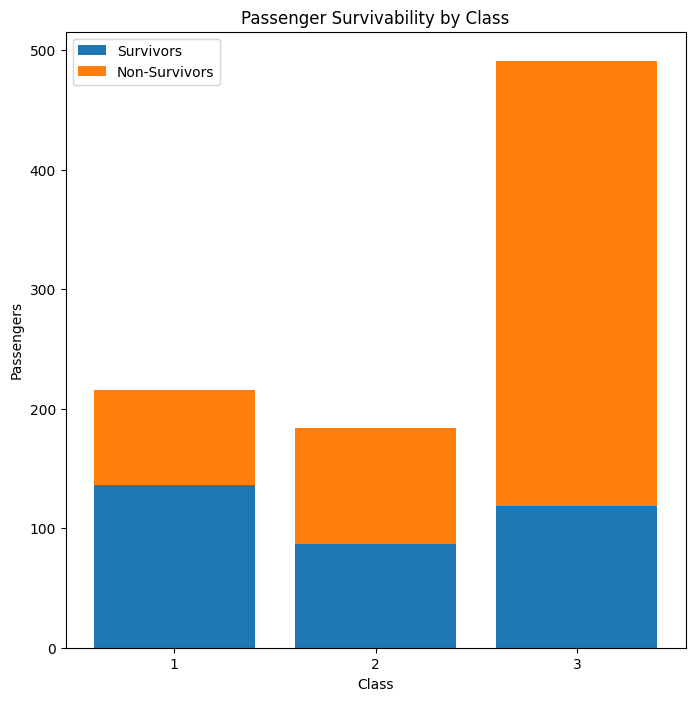

In [25]:
# Drawing a bar chart of passenager class and survival

labels = ['1', '2', '3']
survivors = [class1_survivors.shape[0], class2_survivors.shape[0], class3_survivors.shape[0]]
non_survivors = [class1.shape[0]- survivors[0], class2.shape[0]-survivors[1], class3.shape[0]-survivors[2]]

# create the bar graph
fig, ax = plt.subplots(figsize=(8,8))

ax.bar(labels, survivors, label='Survivors')
ax.bar(labels, non_survivors, bottom=survivors, label='Non-Survivors')

ax.set_ylabel('Passengers')
ax.set_xlabel('Class')
ax.set_title('Passenger Survivability by Class')
ax.legend()

plt.show()

MI wants numerical data for everything. Encoding allows MI to convert to numberical:
- interger
- one-hot (1 if it is, 0 if it isn't)
Both methods convert word/catergorical to numerical form.


In [26]:
#Data Scrubbing - Part 2 'Encoding'
#Creating new One-hot encoded columns
dummies = []
cols = ['Pclass', 'Sex', 'Embarked']

In [27]:
for col in cols:
	dummies.append(pd.get_dummies(train_dataset[col]))

all_dummies = pd.concat(dummies, axis=1)
all_dummies

,1,2,3,female,male,C,Q,S
0,False,False,True,False,True,False,False,True
1,True,False,False,True,False,True,False,False
2,False,False,True,True,False,False,False,True
3,True,False,False,True,False,False,False,True
4,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...
886,False,True,False,False,True,False,False,True
887,True,False,False,True,False,False,False,True
888,False,False,True,True,False,False,False,True
889,True,False,False,False,True,True,False,False


In [28]:
# Add dummies to df and remove the old columns
train_dataset = pd.concat((train_dataset,all_dummies), axis=1)
train_dataset = train_dataset.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [29]:
train_dataset.head(5)

,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,0,22.0,1,0,7.2500,False,False,True,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,False,True,False,True,False,False
2,1,26.0,0,0,7.9250,False,False,True,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,True,False,False,False,True
4,0,35.0,0,0,8.0500,False,False,True,False,True,False,False,True


In [30]:
#Data Scrubbing - Part 3 Labelling our data/Supervised learning.
#seperate features from the targets
X = train_dataset.loc[:, train_dataset.columns != 'Survived'].values
y = train_dataset['Survived'].values

In [31]:
X

array([[22.0, 1, 0, ..., False, False, True],
       [38.0, 1, 0, ..., True, False, False],
       [26.0, 0, 0, ..., False, False, True],
       ...,
       [24.0, 1, 2, ..., False, False, True],
       [26.0, 0, 0, ..., True, False, False],
       [32.0, 0, 0, ..., False, True, False]], dtype=object)

In [32]:
X[0]

array([22.0, 1, 0, 7.25, False, False, True, False, True, False, False,
       True], dtype=object)

In [33]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [ ]:
#DATA Scrubbing - Part 4 'Feature Scaling'

#Scaling the age and fare features
from sklearn import preprocessing
X[:, 0] = preprocessing.scale(X[:,0])
X[:, 3] = preprocessing.scale(X[:, 3])

In [35]:
X[0]

array([-0.533833690156903, 1, 0, -0.5024451714361923, False, False, True,
       False, True, False, False, True], dtype=object)

In [36]:
len(X)

891

In [37]:
#Split Validation
# 80/20 train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#IMPORT TEST DATA
from google.colab import files


In [48]:
uploaded = files.upload()

Saving test.csv to test (1).csv


In [50]:
import io
test_dataset = pd.read_csv(io.BytesIO(uploaded['test.csv']))

In [51]:
test_dataset.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
test_dataset.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [53]:
test_dataset.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [54]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [55]:
#Delete what should be deleted
del test_dataset['Ticket']
del test_dataset['Cabin']

In [56]:
test_dataset['Embarked'].fillna(test_dataset['Embarked'].mode()[0], inplace=True)

<ipython-input-56-b21d4b8e5276>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_dataset['Embarked'].fillna(test_dataset['Embarked'].mode()[0], inplace=True)


In [57]:
test_dataset.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [58]:
test_dataset.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [59]:
print(test_dataset['Age'].max())
print(test_dataset['Age'].min())
print(test_dataset['Age'].max() - test_dataset['Age'].min())

76.0
0.17
75.83


In [60]:
#Check if age is affected by sex
test_dataset.groupby('Sex', as_index=False)['Age'].median()
#Check if age is affected by Pclass
test_dataset.groupby('Pclass', as_index=False)['Age'].median()

,Pclass,Age
0,1,42.0
1,2,26.5
2,3,24.0


In [61]:
#Filling the NaN values in the age coloum with the median value of the age per class


test_dataset.loc[(test_dataset.Age.isna()) & ((test_dataset.Pclass == 1)), "Age"] = 37.0
test_dataset.loc[(test_dataset.Age.isna()) & ((test_dataset.Pclass == 2)), "Age"] = 29.0
test_dataset.loc[(test_dataset.Age.isna()) & ((test_dataset.Pclass == 3)), "Age"] = 24.0

In [62]:
test_dataset.head(10)

test_dataset.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,1
Embarked,0


In [63]:
male = test_dataset[test_dataset.Sex == 'male']
female = test_dataset[test_dataset.Sex == 'female']

In [64]:
male.head(5)
female.head(5)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,7.6292,Q
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,7.2292,C
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,82.2667,S


In [65]:
#Creating new One-hot encoded columns
dummies = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
  dummies.append(pd.get_dummies(test_dataset[col]))




all_dummies = pd.concat(dummies, axis=1)
all_dummies

,1,2,3,female,male,C,Q,S
0,False,False,True,False,True,False,True,False
1,False,False,True,True,False,False,False,True
2,False,True,False,False,True,False,True,False
3,False,False,True,False,True,False,False,True
4,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...
413,False,False,True,False,True,False,False,True
414,True,False,False,True,False,True,False,False
415,False,False,True,False,True,False,False,True
416,False,False,True,False,True,False,False,True


In [66]:
# Add dummies to df and remove the old columns
test_dataset = pd.concat((test_dataset,all_dummies), axis=1)
test_dataset = test_dataset.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [67]:
test_dataset.head(5)

,PassengerId,Name,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S
0,892,"Kelly, Mr. James",34.5,0,0,7.8292,False,False,True,False,True,False,True,False
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,False,False,True,True,False,False,False,True
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,False,True,False,False,True,False,True,False
3,895,"Wirz, Mr. Albert",27.0,0,0,8.6625,False,False,True,False,True,False,False,True
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,False,False,True,True,False,False,False,True


In [68]:
X_test = test_dataset.loc[:, test_dataset.columns != 'Survived'].values

In [69]:
X[0]

array([-0.533833690156903, 1, 0, -0.5024451714361923, False, False, True,
       False, True, False, False, True], dtype=object)